# Plotting Tiles

## Objectives

Introduce several different methods for plotting ECCO v4 fields that are stored as tiles in `Datasets` or `DataArrays`.

## Introduction

*"Over the years many different plotting modules and packages have been developed for Python. For most of that time there was no clear favorite package, but recently matplotlib has become the most widely used. Nevertheless, many of the others are still available and may suit your tastes or needs better. Some of these are interfaces to existing plotting libraries while others are Python-centered new implementations.*
-- from : https://wiki.python.org/moin/NumericAndScientific/Plotting


The link above profiles a long list of Python tools for plotting.  In this tutorial we use just two libraries, *matplotlib* and *basemap*.

### matplotlib
*"Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits."*

*"For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users."*
-- from https://matplotlib.org/index.html

Matplotlib and pyplot even have a tutorial: https://matplotlib.org/users/pyplot_tutorial.html

### Basemap

*"The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. It is similar in functionality to the matlab mapping toolbox, the IDL mapping facilities, GrADS, or the Generic Mapping Tools."*
-- from https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement


This tutorial is not an exhaustive lesson on Python plotting.  We introduce basic plotting of output and show some custom ECCO-specific routines for plotting ECCO fields that have been loaded as `DataArrays` and stored as `numpy` arrays. 


### The default orientation of the lat-lon-cap tile fields

![DataArray-diagram](../figures/llc90.png)



## 2D plots of fields from single tiles

First, let's load the global set of SSH and model grid variables. 

In [18]:
import numpy as np
from copy import deepcopy 
import xarray as xr
import sys

import matplotlib.pylab as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

sys.path.append('/Users/ifenty/git_repo_mine/ECCOv4-py')
import ecco_v4_py as ecco

# specify the location of your nctiles_monthly directory
data_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/'    
var = 'SSH'
var_type = 'c'
ssh_all_tiles = ecco.load_all_tiles_from_netcdf(data_dir, var, var_type, less_output=True)

# specify the location of your nctiles_grid directory
grid_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_grid/'
var = 'GRID'
var_type = 'grid'
grid_all_tiles = ecco.load_all_tiles_from_netcdf(grid_dir, var, var_type, less_output=True)

# Merge these datasets
v4 = xr.merge([ssh_all_tiles, grid_all_tiles])

Populating the interactive namespace from numpy and matplotlib
Finished loading all 13 tiles of SSH
Finished loading all 13 tiles of GRID


### Plotting a single tile with imshow


First we'll plot the Jan 1992 average (month = 1) SSH on tiles 3, 7, and 8 using the `imshow` routine from *pyplot*.  We are plotting these three tiles to demonstrate the different orientation of the lat-lon-cap arrays loaded from the ECCO v4 NetCDF tile files.

> Note:: The **origin='lower'** argument to `imshow` is required to make the $y$ origin at the bottom of the plot.

#### Tile 3 (Northeast N. Atlantic)

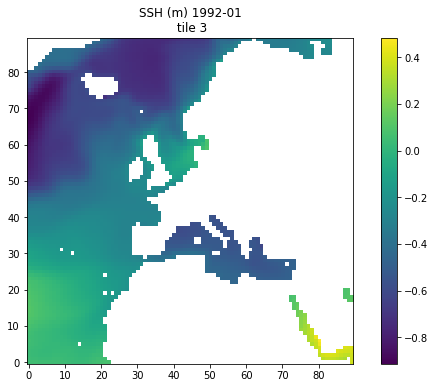

In [54]:
# Step 1, select the tile to plot using the **.sel( )** syntax.  
tile_to_plot = v4.SSH.sel(tile=3, time=1)

# Step 2, use plt.imshow() 
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 3')

# Step 4, send the show() command to show the plot.
plt.show()

#### Tile 7 (the Arctic cap)

This time we'll plot the Arctic cap tile 7.  Notice the layout of the Arctic cap tile in $x$ and $y$.  We'll follow the same procedure for plotting except we'll use LaTeX to add arrows in the $x$ and $y$ axis labels (for fun).

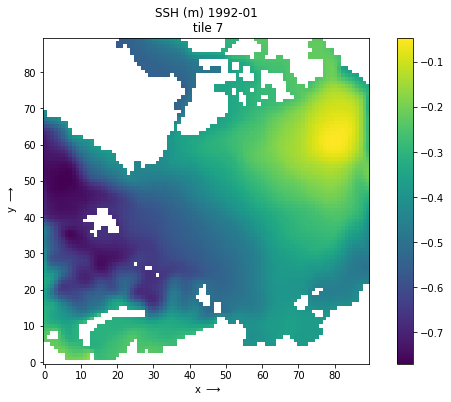

In [55]:
tile_to_plot = v4.SSH.sel(tile=7, time=1)
plt.imshow(tile_to_plot, origin='lower');
plt.colorbar()
plt.title('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 7')
# to interpret a string as LaTex, use r' instead of '
plt.xlabel(r' x $\longrightarrow$')
plt.ylabel(r' y $\longrightarrow$')
plt.show()

#### Tile 8 (N. Pacific / Bering Sea / Chukchi Sea)

The variables from tiles 8-13 in the ECCO v4 NetCDF files are rotated 90 degrees counter-clockwise relative to tiles 1-6.  This strange orientation is a consequence of the Cartesian curvilinear coordinate system used by the lat-lon-cap grid.  For tiles 8-13, positive $x$ is southwards and positive $y$ is eastwards.
> Note: **  This orientation can be frustrating to deal with at first but don't worry, we'll introduce routines to reorient these tiles so that they line up with tiles 1-6 in the next tutorial!**

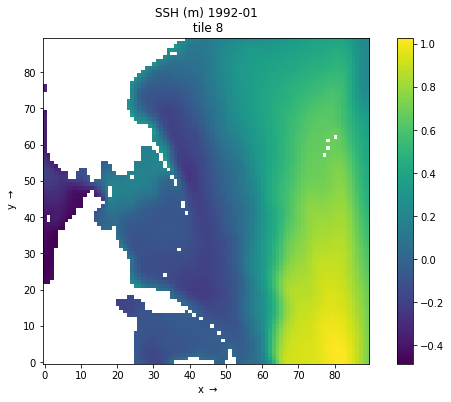

In [56]:
tile_to_plot = v4.SSH.sel(tile=8, time=1)
plt.imshow(tile_to_plot, origin='lower');
plt.colorbar()
plt.title('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 8')
plt.xlabel(r" x $\rightarrow$")
plt.ylabel(r" y $\rightarrow$")
plt.show()

### Plotting a single tile with pcolor and contourf

The `pcolor` and `contourf` routines allows us to add latitude and longitude to the figure.  Because SSH is a 'c' point variable, its lat/lon coordinates are in ``XC``/``YC`` or ``lon_c``/``lat_c``.  Let's use ``lon_c`` and ``lat_c``.

We won't plot the Arctic cap because of the singularity at the pole and the 360 wrapping in longitude.  

`contourf` will be demonstrated for tile 8.

#### Tile 3 (Northeast N. Atlantic)

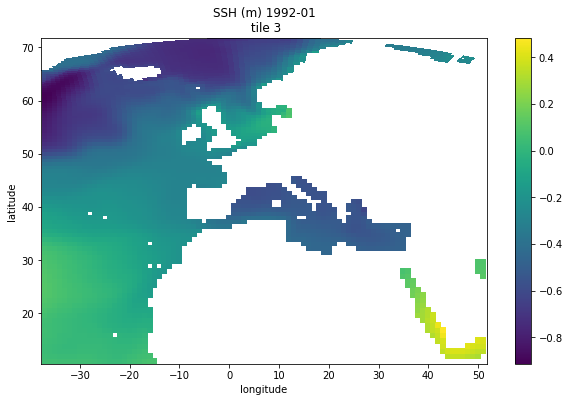

In [74]:
# select tile 3's lats and l
lons = v4.lon_c.sel(tile=3)
lats = v4.lat_c.sel(tile=3)
tile_to_plot = v4.SSH.sel(tile=3, time=1)
plt.pcolor(lons, lats, tile_to_plot)
plt.colorbar()
plt.title('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 3')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

#### Tile 8 (N. Pacific / Bering Sea / Chukchi Sea)

`pcolor` and `contourf` will orient fields geographically because it uses latitude and longitude as the x and y coordinates.

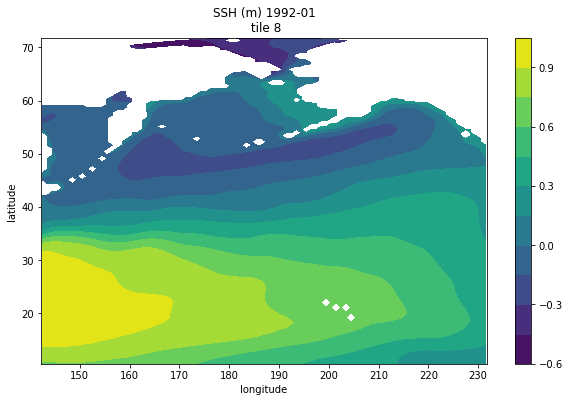

In [77]:
lons = v4.lon_c.sel(tile=8)
lats = v4.lat_c.sel(tile=8)

# we must convert the longitude coordinates from 
# [-180 to 180] to [0 to 360] 
# because of the crossing of the international date line.
lons_tmp = np.copy(lons)
lons_tmp[lons_tmp < 0] = lons_tmp[lons_tmp < 0]+360

tile_to_plot = v4.SSH.sel(tile=8, time=1)

# the fourth argument to contourf (30) is the number of different color levels to use
plt.contourf(lons_tmp, lats, tile_to_plot, 10)

plt.colorbar()
plt.title('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 8')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [ ]:


#%%
 tn = 7
lons = v4.XC.sel(tile=tn)
lats = v4.YC.sel(tile=tn)
tile_to_plot = v4.SSH.sel(tile=tn, time=1)
 map = Basemap(projection='npstere',boundinglat=65,lon_0=0,
            resolution='l')
x,y = map(lons.values, lats.values)
 plt.figure()
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawmapboundary(fill_color='white')
 # draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
map.fillcontinents(color='lightgray',lake_color='lightgray')
map.pcolor(x,y, tile_to_plot ,cmap='jet')
cbar=plt.colorbar()
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7] + '\n tile 7')
 
#%%
plt.close('all')
 map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0, urcrnrlon=360, 
    resolution='c')

plt.figure()
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawmapboundary(fill_color='white')
 # draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
map.fillcontinents(color='lightgray',lake_color='lightgray')
 tn = 8
lons = v4.XC.sel(tile=tn)
lats = v4.YC.sel(tile=tn)
tile_to_plot = v4.SSH.sel(tile=tn, time=1)

lons_tmp = np.copy(lons);
lons_tmp[lons_tmp < 0] = lons_tmp[lons_tmp < 0] + 360
 x,y = map(lons_tmp, lats)
map.pcolor(x,y, tile_to_plot, cmap='jet')
plt.colorbar()
 plt.suptitle('SSH for tile 8 ' + str(v4.tim[0].values)[0:7])
  #%%  PLOTTING 13 TILES SIMULTANEOUSLY

tiles = v4.SSH.sel(time=1)
#%%
tp.plot_tiles(v4.SSH.sel(time=1), cbar=True, cmin=-1.5, cmax=1.5, 
              layout='llc')
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])
 #%%
 plt.figure()
tp.plot_tiles(v4.SSH.sel(time=1), cbar=True, cmin=-1.5, cmax=1.5, 
                  layout='latlon')
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])
 #%%

plt.close('all')
ecco.plot_tiles_proj(v4.XC, 
                     v4.YC,
                     v4.SSH.sel(time=1),
                     cbar=True,
                     plot_type = 'contourf',
                     projection_type = 'robin')
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])
 
#%%
plt.close('all')
ecco.plot_tiles_proj(v4.XC, 
                     v4.YC,
                     v4.SSH.sel(time=1),
                     cbar=True,
                     plot_type = 'contourf', lon_0=0,
                     projection_type = 'cyl')
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])

#%%

my_cmin =-1.; my_cmax=.5;  my_cint=.05
my_num_levels = len(np.arange(my_cmin,my_cmax+my_cint, my_cint))

plt.close('all')
tp.plot_tiles_proj(v4.XC, 
                   v4.YC,
                   v4.SSH.sel(time=1),
                   cbar=True,
                   plot_type = 'contourf', lon_0=0,
                   projection_type = 'stereo',bounding_lat=50,
                   cbar_label='meters',
                   num_levels = my_num_levels,
                   cmin = my_cmin,
                   cmax = my_cmax)
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])
 #%%
my_cmin =-2.; my_cmax=1.;  my_cint=.05
my_num_levels = len(np.arange(my_cmin,my_cmax+my_cint, my_cint))

plt.close('all')
tp.plot_tiles_proj(v4.XC, 
                   v4.YC,
                   v4.SSH.sel(time=1),
                   cbar=True,
                   plot_type = 'contourf', lon_0=180,
                   projection_type = 'stereo',bounding_lat=-40,
                   cbar_label='meters', 
                   num_levels = my_num_levels,
                   cmin = my_cmin,
                   cmax = my_cmax)
plt.suptitle('SSH (m) ' + str(v4.tim[0].values)[0:7])

  

## Variable assignments

Unlike some other languages, creating a new variable with an assignment statement in Python such as
`
x = some_numpy_array
`

does not make a copy of ``some_numpy_array``.  Instead, the assignment statement makes ``x`` and ``some_numpy_array`` both point to the same `numpy` array in memory.  Because ``x`` and ``some_numpy_array`` are both refer (or pointer) to the same `numpy` array in memory, the `numpy` array can be changed by operations on either ``x`` or ``some_numpy_array``.  If you aren't aware of this behavior then you may run into very difficult to identify bugs in your calculations!

### A simple demonstration

Let's demonstrate this issue with a very simple `numpy` array

In [1]:
import numpy as np
from copy import deepcopy 
import ecco_v4_py as ecco
import xarray as xr

ImportError: No module named py

In [ ]:
# Create a simple numpy array
a=np.array([1, 2, 3, 4, 5])

# Assign 'b' to point to the same numpy array
b=a

# Test to see if b and a point to the same thing
b is a

Now change the fourth element of ``b`` and print both ``a`` and ``b``

In [ ]:
b[3] = 10
print a
print b

### A fancier demonstration

Let's now demonstrate with a `numpy` array that stores ``SSH`` output.

In [ ]:
# specify the location of your nctiles_monthly directory
data_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/'    
var = 'SSH'
var_type = 'c'
ssh_all_tiles = ecco.load_all_tiles_from_netcdf(data_dir, var, var_type)
ecco.minimal_metadata(ssh_all_tiles)

# specify the location of your nctiles_grid directory
grid_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_grid/'
var = 'GRID'
var_type = 'grid'
grid_all_tiles = ecco.load_all_tiles_from_netcdf(grid_dir, var, var_type)
ecco.minimal_metadata(grid_all_tiles)

# Merge these datasets
output_all = xr.merge([ssh_all_tiles, grid_all_tiles])

Recall the dimensions of our ``SSH`` `DataArray`:

In [ ]:
output_all.SSH.dims

Show the first four SSH values in **j** and **i** for the fifth month (May 1992) and second tile:

In [ ]:
output_all.SSH[4,1,0:4,0:4].values

Assign the variable `ssh_tmp` to this *subset* of the `numpy` array that ``SSH`` points to:

In [ ]:
ssh_tmp = output_all.SSH[4,1,0:2,0:2].values
ssh_tmp

Now change the values of all elements of ``ssh_tmp`` to 10

In [ ]:
ssh_tmp[:] = 10
ssh_tmp

And see that yes, in fact, this change is reflected in our ``SSH`` `DataArray`:

In [ ]:
output_all.SSH[4,1,0:4,0:4].values

## Dealing with *pass-by-reference*: right hand side operations

One way to have a new variable assignment not point to the original variable is to *perform an operation on the right hand side of the assignment statement*.  

"Python evaluates expressions from left to right. Notice that while evaluating an assignment, the right-hand side is evaluated before the left-hand side."
https://docs.python.org/2/reference/expressions.html#evaluation-order

Performing an operation on the right hand side creates new values in memory.  The new variable assignment will then point to these new values, leaving the original untouched.

### Simple demonstration 1
Operate on ``a`` by adding 1 before the assigment statement

In [ ]:
# Create a simple numpy array
a=np.array([1, 2, 3, 4, 5])

b = a + 1

print a
print b

Now change the fourth element of ``b`` and print both ``a`` and ``b``

In [ ]:
b[3] = 10
print a
print b

``a`` and ``b`` do indeed point to different values in memory.

### Simple demonstration 2

Operate on ``a`` by adding 0 before the assigment statement.  This is a kind of dummy operation.

In [ ]:
# Create a simple numpy array
a=np.array([1, 2, 3, 4, 5])

# Add 0 to `a`:
b = a + 0

print a
print b

In [ ]:
# Test to see if b and a point to the same thing
b is a

Now change the fourth element of ``b`` and print both ``a`` and ``b``

In [ ]:
b[3] = 10
print a
print b

Once again we see that ``a`` and ``b`` do indeed point to different values in memory.

### A fancier demonstration

Let's now demonstrate with a `numpy` array that stores ``SSH`` output.

In [ ]:
output_all.SSH[4,1,5:9,5:9].values

In [ ]:
ssh_tmp = output_all.SSH[4,1,5:9,5:9].values * output_all.RAC[1,5:9,5:9].values
ssh_tmp[:] = 10
ssh_tmp

In [ ]:
output_all.SSH[4,1,5:9,5:9].values

Operating on the right hand side of the assignment does indeed new arrays in memory leaving the original SSH `numpy` array untouched.

## Dealing with *pass-by-reference*: copy and deepcopy

A second way to have a new variable assignment not point to the original variable is to *use the copy or deepcopy command*.

### Simple demonstration
Use the `numpy` command.

In [ ]:
# Create a simple numpy array
a=np.array([1, 2, 3, 4, 5])
b=np.copy(a)

print a
print b

Now change the fourth element of ``b`` and print both ``a`` and ``b``

In [ ]:
b[3] = 10
print a
print b

In [ ]:
output_all.SSH

### Fancier demonstration

`Dataset` and `DataArray` objects are too complicated for `numpy`'s `copy` command.  For complex objects such as these use the `deepcopy` command.

In [ ]:
ssh_tmp = deepcopy(output_all.SSH)
ssh_tmp[:] = 10
ssh_tmp[4,1,5:9,5:9].values

In [ ]:
output_all.SSH[4,1,5:9,5:9].values

Using `deepcopy` gives us an entirely new array in memory.  Operations on ``ssh_tmp`` do not affect the original fields that we found in the `output_all_SSH` `DataArray`.

#### alternative to `deepcopy`
`xarray` give us another way to deepcopy `DataArrays` and `Datasets`:

``
ssh_tmp = output_all.copy(deep=True)
``

## Conclusion

You now know about the possible pitfalls for dealing with Python's **pass-by-reference** way of handling assignment statements and different methods for making copies of `numpy` arrays and `Datasets` and `DataArrays`.  